
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [923]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler



# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [924]:

#cargo los datos del dataset de pokemon

my_cols = pd.read_csv("Data\pokemon\columns.csv").column.values.tolist()
my_data = pd.read_csv('Data\pokemon\pokemon.csv',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

In [925]:
my_cols

['name',
 'japanese_name',
 'pokedex_number',
 'percentage_male',
 'type1',
 'type2',
 'classification',
 'height_m',
 'weight_kg',
 'capture_rate',
 'baseeggsteps',
 'abilities',
 'experience_growth',
 'base_happiness',
 'against_?',
 'hp',
 'attack',
 'defense',
 'sp_attack',
 'sp_defense',
 'speed',
 'generation',
 'is_legendary']

In [926]:
#visualizo datos
my_data

name  \
['Overgrow', 'Chlorophyll'] 1.00 1.0 1.0 0.5 0.5 0.5 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0   0.5   
                                                                                              1.0   0.5   
                                                                                              1.0   0.5   
['Blaze', 'Solar Power']    0.50 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.50 2.0 0.5 1.0 1.0 1.0 2.0 0.5   2.0   
                                                                                              0.5   2.0   
...                                                                                                 ...   
['Beast Boost']             0.25 1.0 0.5 2.0 0.5 1.0 2.0 0.5 1.0 0.25 0.0 1.0 0.5 0.0 0.5 1.0 0.5   1.0   
                            1.00 1.0 0.5 0.5 0.5 2.0 4.0 1.0 1.0 0.25 1.0 1.0 0.5 0.0 0.5 0.5 0.5   0.5   
                            2.00 0.5 2.0 0.5 4.0 2.0 0.5 1.0 0.5 0.50 1.0 2.0 1.0 1.0 0.0 1.0 1.0   0.5   
['Prism Armor']             2.00 2.0 1.0 1.0 1.0 0.5 1.0 1.0 2.0 1.00 1.0 1.0 1.0 1.0 0.5 1.0 1.0   1.0   
['Soul-Heart']              0.25 0.5 0.0 1.0 0.5 1.0 2.0 0.5 1.0 0.50 2.0 0.5 0.5 0.0 0.5 0.5 1.0   1.0   

                                                                                                   japanese_name  \
['Overgrow', 'Chlorophyll'] 1.00 1.0 1.0 0.5 0.5 0.5 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0             49   
                                                                                              1.0             62   
                                                                                              1.0            100   
['Blaze', 'Solar Power']    0.50 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.50 2.0 0.5 1.0 1.0 1.0 2.0 0.5             52   
                                                                                              0.5             64   
...                                                                                                          ...   
['Beast Boost']             0.25 1.0 0.5 2.0 0.5 1.0 2.0 0.5 1.0 0.25 0.0 1.0 0.5 0.0 0.5 1.0 0.5            101   
                            1.00 1.0 0.5 0.5 0.5 2.0 4.0 1.0 1.0 0.25 1.0 1.0 0.5 0.0 0.5 0.5 0.5            181   
                            2.00 0.5 2.0 0.5 4.0 2.0 0.5 1.0 0.5 0.50 1.0 2.0 1.0 1.0 0.0 1.0 1.0            101   
['Prism Armor']             2.00 2.0 1.0 1.0 1.0 0.5 1.0 1.0 2.0 1.00 1.0 1.0 1.0 1.0 0.5 1.0 1.0            107   
['Soul-Heart']              0.25 0.5 0.0 1.0 0.5 1.0 2.0 0.5 1.0 0.50 2.0 0.5 0.5 0.0 0.5 0.5 1.0             95   

                                                                                                   pokedex_number  \
['Overgrow', 'Chlorophyll'] 1.00 1.0 1.0 0.5 0.5 0.5 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0            5120   
                                                                                              1.0            5120   
                                                                                              1.0            5120   
['Blaze', 'Solar Power']    0.50 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.50 2.0 0.5 1.0 1.0 1.0 2.0 0.5            5120   
                                                                                              0.5            5120   
...                                                                                                           ...   
['Beast Boost']             0.25 1.0 0.5 2.0 0.5 1.0 2.0 0.5 1.0 0.25 0.0 1.0 0.5 0.0 0.5 1.0 0.5           30720   
                            1.00 1.0 0.5 0.5 0.5 2.0 4.0 1.0 1.0 0.25 1.0 1.0 0.5 0.0 0.5 0.5 0.5           30720   
                            2.00 0.5 2.0 0.5 4.0 2.0 0.5 1.0 0.5 0.50 1.0 2.0 1.0 1.0 0.0 1.0 1.0           30720   
['Prism Armor']             2.00 2.0 1.0 1.0 1.0 0.5 1.0 1.0 2.0 1.00 1.0 1.0 1.0 1.0 0.5 1.0 1.0           30720   
['Soul-Heart']              0.25 0.5 0.0 1.0 0.5 1.0 2.0 0.5 1.0 0.50 2.0 0.5 0.5 0.0 0.5 0.5 1.0           30720   

                

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).

En el dataset tenemos 

'nombre_japonés',  *'pokedex_number'*  ,'porcentaje_masculino','tipo 1','tipo 2''clasificación','altura_m','peso_kg',  *'tasa_de_captura'*  ,'pasos básicos','habilidades','experiencia_crecimiento','base_felicidad''contra_?', *'hp'*,*'ataque'*,*'defensa'*,*'sp_ataque'*,*'sp_defensa'*,*'velocidad'*  ,'generación',  *'es_legendario'* 

Obviamente la caracteristica más importante de este dataset es "is_legendary" ya que nos indica si el pokemon es o no legendaria

Además de esto, las características físicas como HP, Ataque, Defensa, Ataque Especial, Defensa Especial y Velocidad también pueden ser importantes para determinar si un Pokémon es legendario o no. Esto se debe a que, en general, los Pokémon legendarios tienen estadísticas más altas que la media.

Otras características como el número en la Pokédex, la tasa de captura podrían ser relevantes para determinar la rareza de un Pokémon y, por lo tanto, su clasificación como legendario o no. 

Esto es dependiendo el enfoque de un maestro pokemon






In [927]:
my_data.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 801 entries, ("['Overgrow', 'Chlorophyll']", 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 2.0, 2.0, 1.0, 0.25, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0) to ("['Soul-Heart']", 0.25, 0.5, 0.0, 1.0, 0.5, 1.0, 2.0, 0.5, 1.0, 0.5, 2.0, 0.5, 0.5, 0.0, 0.5, 0.5, 1.0)
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    float64
 1   japanese_name      801 non-null    int64  
 2   pokedex_number     801 non-null    int64  
 3   percentage_male    801 non-null    int64  
 4   type1              801 non-null    int64  
 5   type2              801 non-null    object 
 6   classification     801 non-null    object 
 7   height_m           801 non-null    int64  
 8   weight_kg          801 non-null    int64  
 9   capture_rate       781 non-null    float64
 10  baseeggsteps       801 non-null    int64  
 11  abilities          801 non-null    object 
 12  e

In [928]:
my_data.isna().sum()


name                   0
japanese_name          0
pokedex_number         0
percentage_male        0
type1                  0
type2                  0
classification         0
height_m               0
weight_kg              0
capture_rate          20
baseeggsteps           0
abilities              0
experience_growth      0
base_happiness        98
against_?              0
hp                     0
attack                 0
defense                0
sp_attack              0
sp_defense           384
speed                 20
generation             0
is_legendary           0
dtype: int64

In [929]:
data = my_data.drop(['name','japanese_name','base_happiness','sp_attack','sp_defense','percentage_male','type1','type2','height_m','weight_kg','abilities','against_?','generation','experience_growth','classification'], axis=1)
import numpy as np
data['is_legendary'] = data['is_legendary'].astype(np.int)
data


C:\Users\siles\AppData\Local\Temp/ipykernel_19104/296954135.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['is_legendary'] = data['is_legendary'].astype(np.int)


pokedex_number  \
['Overgrow', 'Chlorophyll'] 1.00 1.0 1.0 0.5 0.5 0.5 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0            5120   
                                                                                              1.0            5120   
                                                                                              1.0            5120   
['Blaze', 'Solar Power']    0.50 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.50 2.0 0.5 1.0 1.0 1.0 2.0 0.5            5120   
                                                                                              0.5            5120   
...                                                                                                           ...   
['Beast Boost']             0.25 1.0 0.5 2.0 0.5 1.0 2.0 0.5 1.0 0.25 0.0 1.0 0.5 0.0 0.5 1.0 0.5           30720   
                            1.00 1.0 0.5 0.5 0.5 2.0 4.0 1.0 1.0 0.25 1.0 1.0 0.5 0.0 0.5 0.5 0.5           30720   
                            2.00 0.5 2.0 0.5 4.0 2.0 0.5 1.0 0.5 0.50 1.0 2.0 1.0 1.0 0.0 1.0 1.0           30720   
['Prism Armor']             2.00 2.0 1.0 1.0 1.0 0.5 1.0 1.0 2.0 1.00 1.0 1.0 1.0 1.0 0.5 1.0 1.0           30720   
['Soul-Heart']              0.25 0.5 0.0 1.0 0.5 1.0 2.0 0.5 1.0 0.50 2.0 0.5 0.5 0.0 0.5 0.5 1.0           30720   

                                                                                                   capture_rate  \
['Overgrow', 'Chlorophyll'] 1.00 1.0 1.0 0.5 0.5 0.5 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0           0.7   
                                                                                              1.0           1.0   
                                                                                              1.0           2.0   
['Blaze', 'Solar Power']    0.50 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.50 2.0 0.5 1.0 1.0 1.0 2.0 0.5           0.6   
                                                                                              0.5           1.1   
...                                                                                                         ...   
['Beast Boost']             0.25 1.0 0.5 2.0 0.5 1.0 2.0 0.5 1.0 0.25 0.0 1.0 0.5 0.0 0.5 1.0 0.5           9.2   
                            1.00 1.0 0.5 0.5 0.5 2.0 4.0 1.0 1.0 0.25 1.0 1.0 0.5 0.0 0.5 0.5 0.5           0.3   
                            2.00 0.5 2.0 0.5 4.0 2.0 0.5 1.0 0.5 0.50 1.0 2.0 1.0 1.0 0.0 1.0 1.0           5.5   
['Prism Armor']             2.00 2.0 1.0 1.0 1.0 0.5 1.0 1.0 2.0 1.00 1.0 1.0 1.0 1.0 0.5 1.0 1.0           2.4   
['Soul-Heart']              0.25 0.5 0.0 1.0 0.5 1.0 2.0 0.5 1.0 0.50 2.0 0.5 0.5 0.0 0.5 0.5 1.0           1.0   

                                                                                                   baseeggsteps  \
['Overgrow', 'Chlorophyll'] 1.00 1.0 1.0 0.5 0.5 0.5 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0            45   
                                                                                              1.0            60   
                                                                                              1.0            80   
['Blaze', 'Solar Power']    0.50 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.50 2.0 0.5 1.0 1.0 1.0 2.0 0.5            39   
                                                                                              0.5            58   
...                                                                                                         ...   
['Beast Boost']             0.25 1.0 0.5 2.0 0.5 1.0 2.0 0.5 1.0 0.25 0.0 1.0 0.5 0.0 0.5 1.0 0.5            97   
                            1.00 1.0 0.5 0.5 0.5 2.0 4.0 1.0 1.0 0.25 1.0 1.0 0.5 0.0 0.5 0.5 0.5            59   
                            2.00 0.5 2.0 0.5 4.0 2.0 0.5 1.0 0.5 0.50 1.0 2.0 1.0 1.0 0.0 1.0 1.0           223   
['Prism Armor']             2.00 2.0 1.0 1.0 1.0 0.5 1.0 1.0 2.0 1.00 1.0 1.0 1.0 1.0 0.5 1.0 1.0            97   
['Soul-Heart']              0.25 0.5 0.0 1.0 0.5

In [930]:
data.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 801 entries, ("['Overgrow', 'Chlorophyll']", 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 2.0, 2.0, 1.0, 0.25, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0) to ("['Soul-Heart']", 0.25, 0.5, 0.0, 1.0, 0.5, 1.0, 2.0, 0.5, 1.0, 0.5, 2.0, 0.5, 0.5, 0.0, 0.5, 0.5, 1.0)
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pokedex_number  801 non-null    int64  
 1   capture_rate    781 non-null    float64
 2   baseeggsteps    801 non-null    int64  
 3   hp              801 non-null    int64  
 4   attack          801 non-null    int64  
 5   defense         801 non-null    int64  
 6   speed           781 non-null    float64
 7   is_legendary    801 non-null    int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 85.5+ KB


In [931]:
data.isna().sum()


pokedex_number     0
capture_rate      20
baseeggsteps       0
hp                 0
attack             0
defense            0
speed             20
is_legendary       0
dtype: int64

In [932]:
from sklearn.impute import SimpleImputer

# crea una instancia del imputador
imputer = SimpleImputer(strategy='mean')

# ajusta el imputador a tus datos
imputer.fit(data[['capture_rate','speed']])

# imputa los valores faltantes en las columnas
data[['capture_rate','speed']] = imputer.transform(data[['capture_rate','speed']])



In [933]:
data.isna().sum()


pokedex_number    0
capture_rate      0
baseeggsteps      0
hp                0
attack            0
defense           0
speed             0
is_legendary      0
dtype: int64

In [934]:
data

pokedex_number  \
['Overgrow', 'Chlorophyll'] 1.00 1.0 1.0 0.5 0.5 0.5 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0            5120   
                                                                                              1.0            5120   
                                                                                              1.0            5120   
['Blaze', 'Solar Power']    0.50 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.50 2.0 0.5 1.0 1.0 1.0 2.0 0.5            5120   
                                                                                              0.5            5120   
...                                                                                                           ...   
['Beast Boost']             0.25 1.0 0.5 2.0 0.5 1.0 2.0 0.5 1.0 0.25 0.0 1.0 0.5 0.0 0.5 1.0 0.5           30720   
                            1.00 1.0 0.5 0.5 0.5 2.0 4.0 1.0 1.0 0.25 1.0 1.0 0.5 0.0 0.5 0.5 0.5           30720   
                            2.00 0.5 2.0 0.5 4.0 2.0 0.5 1.0 0.5 0.50 1.0 2.0 1.0 1.0 0.0 1.0 1.0           30720   
['Prism Armor']             2.00 2.0 1.0 1.0 1.0 0.5 1.0 1.0 2.0 1.00 1.0 1.0 1.0 1.0 0.5 1.0 1.0           30720   
['Soul-Heart']              0.25 0.5 0.0 1.0 0.5 1.0 2.0 0.5 1.0 0.50 2.0 0.5 0.5 0.0 0.5 0.5 1.0           30720   

                                                                                                   capture_rate  \
['Overgrow', 'Chlorophyll'] 1.00 1.0 1.0 0.5 0.5 0.5 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0           0.7   
                                                                                              1.0           1.0   
                                                                                              1.0           2.0   
['Blaze', 'Solar Power']    0.50 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.50 2.0 0.5 1.0 1.0 1.0 2.0 0.5           0.6   
                                                                                              0.5           1.1   
...                                                                                                         ...   
['Beast Boost']             0.25 1.0 0.5 2.0 0.5 1.0 2.0 0.5 1.0 0.25 0.0 1.0 0.5 0.0 0.5 1.0 0.5           9.2   
                            1.00 1.0 0.5 0.5 0.5 2.0 4.0 1.0 1.0 0.25 1.0 1.0 0.5 0.0 0.5 0.5 0.5           0.3   
                            2.00 0.5 2.0 0.5 4.0 2.0 0.5 1.0 0.5 0.50 1.0 2.0 1.0 1.0 0.0 1.0 1.0           5.5   
['Prism Armor']             2.00 2.0 1.0 1.0 1.0 0.5 1.0 1.0 2.0 1.00 1.0 1.0 1.0 1.0 0.5 1.0 1.0           2.4   
['Soul-Heart']              0.25 0.5 0.0 1.0 0.5 1.0 2.0 0.5 1.0 0.50 2.0 0.5 0.5 0.0 0.5 0.5 1.0           1.0   

                                                                                                   baseeggsteps  \
['Overgrow', 'Chlorophyll'] 1.00 1.0 1.0 0.5 0.5 0.5 2.0 2.0 1.0 0.25 1.0 2.0 1.0 1.0 2.0 1.0 1.0            45   
                                                                                              1.0            60   
                                                                                              1.0            80   
['Blaze', 'Solar Power']    0.50 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.50 2.0 0.5 1.0 1.0 1.0 2.0 0.5            39   
                                                                                              0.5            58   
...                                                                                                         ...   
['Beast Boost']             0.25 1.0 0.5 2.0 0.5 1.0 2.0 0.5 1.0 0.25 0.0 1.0 0.5 0.0 0.5 1.0 0.5            97   
                            1.00 1.0 0.5 0.5 0.5 2.0 4.0 1.0 1.0 0.25 1.0 1.0 0.5 0.0 0.5 0.5 0.5            59   
                            2.00 0.5 2.0 0.5 4.0 2.0 0.5 1.0 0.5 0.50 1.0 2.0 1.0 1.0 0.0 1.0 1.0           223   
['Prism Armor']             2.00 2.0 1.0 1.0 1.0 0.5 1.0 1.0 2.0 1.00 1.0 1.0 1.0 1.0 0.5 1.0 1.0            97   
['Soul-Heart']              0.25 0.5 0.0 1.0 0.5

In [935]:
data = data.reset_index(drop=True) #elimino los index
#data['sp_defense'] = data['sp_defense'].fillna('Sininformación') #no tengo informacion donde estan los nan
data


,pokedex_number,capture_rate,baseeggsteps,hp,attack,defense,speed,is_legendary
0,5120,0.7,45,65,65,45,6.9,0
1,5120,1.0,60,80,80,60,13.0,0
2,5120,2.0,80,122,120,80,100.0,0
3,5120,0.6,39,60,50,65,8.5,0
4,5120,1.1,58,80,65,80,19.0,0
...,...,...,...,...,...,...,...,...
796,30720,9.2,97,107,101,61,999.9,1
797,30720,0.3,59,59,31,109,0.1,1
798,30720,5.5,223,97,53,43,888.0,1
799,30720,2.4,97,127,89,79,230.0,1


In [936]:
# tenemos que pasar sp_defense sp_ataack oneHotEncoer
#from sklearn.preprocessing import OneHotEncoder
#import pandas as pd

#onehot_encoder = OneHotEncoder()

#column_to_encode= data[['sp_attack','sp_defense']]

# Crear una matriz de variables dummy codificadas
#encoded_column = onehot_encoder.fit_transform(column_to_encode)


# Crear un nuevo DataFrame con las variables dummy
#dummy_df = pd.DataFrame(encoded_column.toarray(), columns=onehot_encoder.get_feature_names(['type_a','type_d']))


# Unir el DataFrame dummy con el DataFrame original
#df = pd.concat([data, dummy_df], axis=1)

# Eliminar la columna original
#df.drop(['sp_attack','sp_defense'], axis=1, inplace=True)
#df.info()
#NOTA: tomamos los ataques y defensas especiales pero se descarto ya que no pudimos ver graficando no aportaba mucho la informacion los datos estaban distibuidos como un cuadraro en cada esquina



# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [937]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

['pokedex_number' 'capture_rate' 'baseeggsteps' 'hp' 'attack' 'defense'
 'speed' 'is_legendary']


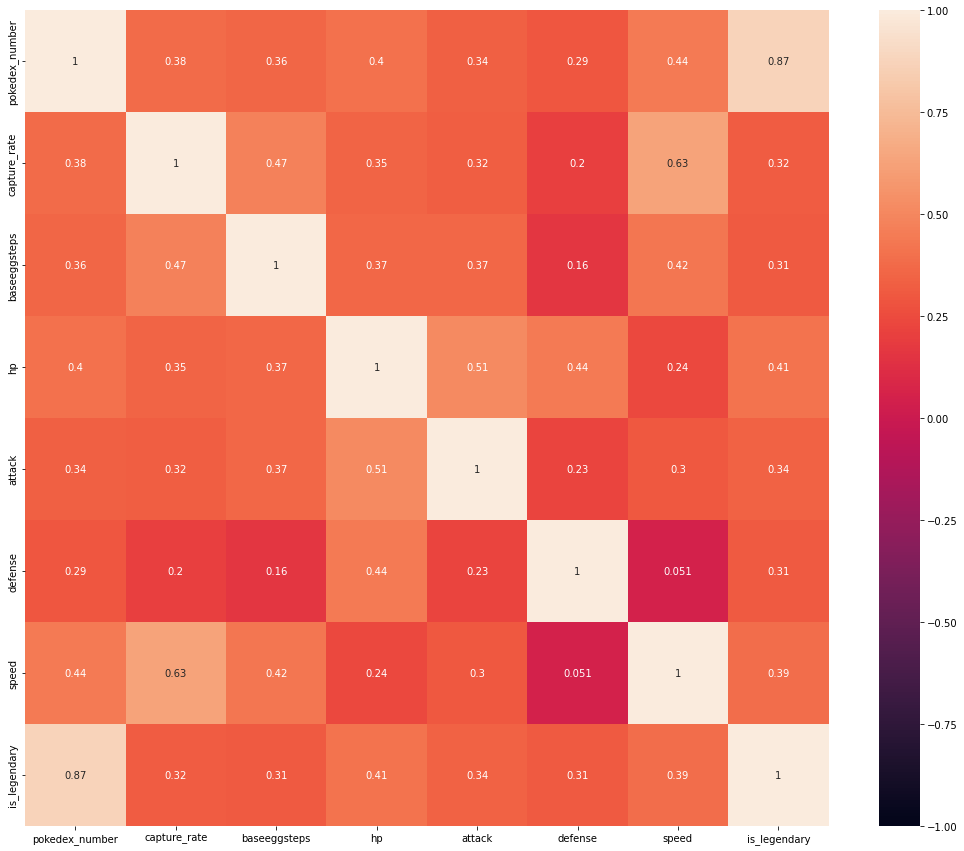

In [938]:

columnas= data.columns.values
print(columnas)
correlation_matrix = data[columnas].corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, vmin=-1.0, vmax=1.0)
plt.show()
#aca podemos sacar alguna deducciones , tenemos una correlación 0.87 con la información del pokedex_number vs legenday



In [939]:

#Selecciono los datos variable predictoras y la variable objetivo
aux_data=data
X= data.drop('is_legendary',axis=1)
y=aux_data['is_legendary']

columnas= X.columns.values
print(columnas)

['pokedex_number' 'capture_rate' 'baseeggsteps' 'hp' 'attack' 'defense'
 'speed']


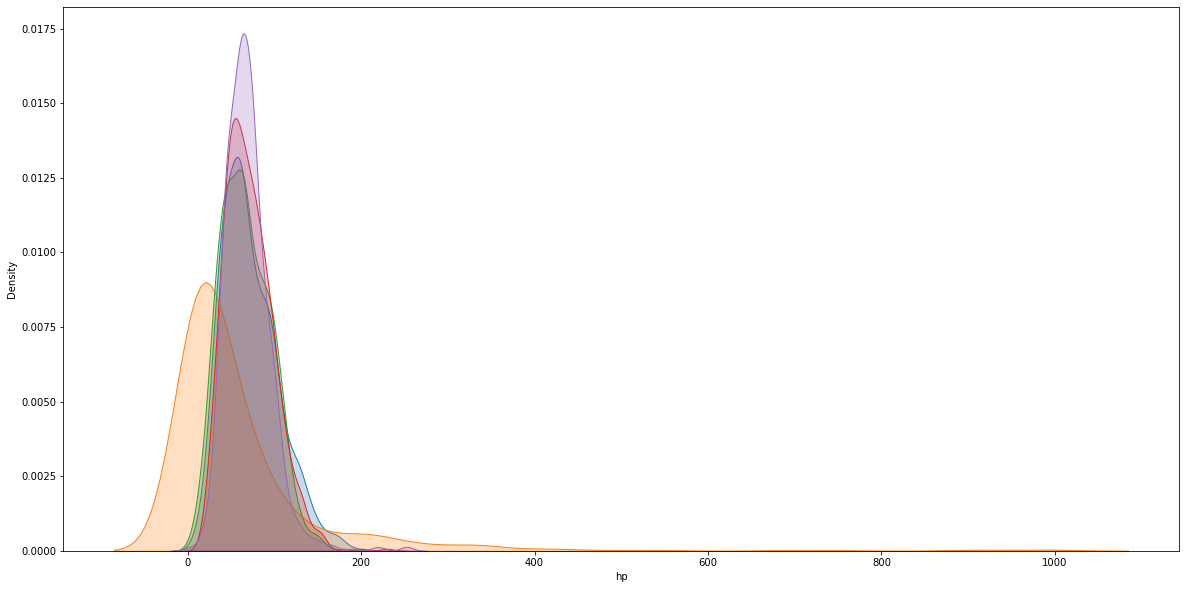

In [940]:
plt.figure(figsize=(20, 10))
for column in ['hp','speed','defense','attack','baseeggsteps']:
    sns.kdeplot(data[column], shade=True)
plt.show()
#distribuciones la mayoria estan centradas

In [941]:
scaler= StandardScaler()
X= scaler.fit_transform(X)


In [942]:
#import matplotlib.pyplot as plt

# lista de características a graficar

# hacer gráficos de dispersión
#for feature in columnas:
 #   plt.scatter(data[feature], data['is_legendary'])
  #  plt.xlabel(feature)
   # plt.ylabel('is_legendary')
    #plt.show()

In [943]:
X.shape

(801, 7)

In [944]:
# Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Crear y ajustar el modelo de regresión logística
logreg = LogisticRegression(max_iter=300).fit(X_train, y_train)

accuracy = logreg.score(X_test, y_test)
print("Accuracy del modelo: {:.2f}%".format(accuracy*100))


Accuracy del modelo: 98.14%


accuracy del modelo es una medida de qué tan bien puede predecir el modelo la clase correcta para una muestra. En este caso, la precisión obtenida del modelo de regresión logística fue del 98.14%, lo que significa que el modelo clasifica correctamente el 98.14% de los casos. Esto indica que el modelo es bastante preciso en la clasificación de las cartas de Pokémon en Legendaria o no Legendaria, y puede ser utilizado para predecir la clase de una nueva muestra. Sin embargo, es importante tener en cuenta que la precisión por sí sola puede no ser suficiente para evaluar completamente la calidad del modelo y que otras métricas como la sensibilidad y la especificidad pueden proporcionar información adicional sobre el desempeño del modelo.

In [945]:
from sklearn.metrics import confusion_matrix
#matriz confución
y_pred = logreg.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[143,   0],
       [  3,  15]], dtype=int64)

In [946]:
#import matplotlib.pyplot as plt

# Realizar predicciones sobre los datos de entrenamiento
#y_pred_train = logreg.predict(X_train)

# Graficar los puntos de entrenamiento junto con el resultado de la predicción
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, marker='x')

# Agregar la recta de regresión a la gráfica
#coef = logreg.coef_[0]
#intercept = logreg.intercept_
#x = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 100)
#y = (-intercept - coef[0]*x) / coef[1]
#plt.plot(x, y)

# Mostrar la gráfica
#plt.show()


El modelo ha clasificado correctamente 143 muestras que son "no legendaria" y 15 muestras que son "legendaria". Sin embargo, el modelo ha clasificado incorrectamente 3 muestras que son "no legendaria" como "legendaria", y no ha clasificado incorrectamente ninguna muestra que es "legendaria" como "no legendaria".

In [947]:

# Crear y ajustar el modelo de ElasticNet 
#menores a este alpha menor el accurary
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)
elastic_net.fit(X_train, y_train)

# Obtener las predicciones y calcular la precisión del modelo
y_pred = elastic_net.predict(X_test).round()
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión del modelo
print("Accuracy del modelo: {:.2f}%".format(accuracy*100))


Accuracy del modelo: 98.76%


In [948]:
#  matriz de confusión
y_pred = elastic_net.predict(X_test).astype(int)
confusion_matrix(y_test, y_pred)
#18 falsos positivos

array([[143,   0],
       [ 18,   0]], dtype=int64)

Para mejorar el modelo utilizando ElasticNet, podemos utilizar la clase ElasticNet de scikit-learn en lugar de la clase LogisticRegression. La clase ElasticNet utiliza una combinación de regularización L1 (Lasso) y L2 (Ridge) para mejorar el rendimiento del modelo. Además, podemos utilizar la clase ElasticNetCV para buscar automáticamente los mejores valores para los hiperparámetros al ajustar el modelo.

In [949]:
#ElasticNetCV

# Crear y ajustar el modelo de regresión logística con ElasticNetCV
elastic_net = ElasticNetCV(cv=5,random_state=42)
elastic_net.fit(X_train, y_train)

# Obtener predicciones y calcular la precisión del modelo
y_pred = elastic_net.predict(X_test)
accuracy = accuracy_score(y_test, y_pred.round())

# Imprimir la precisión del modelo
print("Accuracy del modelo: {:.2f}%".format(accuracy*100))


Accuracy del modelo: 98.76%


In [950]:
from sklearn.metrics import confusion_matrix

# Obtener las predicciones redondeadas como enteros
y_pred = elastic_net.predict(X_test).astype(int)

# Obtener la matriz de confusión
confusion_matrix(y_test, y_pred)



array([[143,   0],
       [ 18,   0]], dtype=int64)

el accuracy del modelo con ElasticNetCV es más alto que el modelo con LogisticRegression, pero la matriz de confusión muestra que el modelo no está prediciendo correctamente la clase positiva (1). En la matriz de confusión que has compartido, todas las predicciones son de la clase negativa (0) y ninguna es de la clase positiva (1). Esto significa que el modelo está teniendo problemas para distinguir entre ambas clases y está fallando en predecir los casos positivos.

Por lo tanto, aunque el accuracy es alto, el modelo no es útil para la tarea de clasificación binaria en cuestión, ya que no está capturando correctamente las observaciones de la clase positiva. Sería necesario trabajar en la mejora del modelo para poder detectar correctamente las observaciones de ambas clases.

In [951]:

# Crear y ajustar el modelo de clasificación
clf = SGDClassifier(loss='log', random_state=42).fit(X_train, y_train)

# Obtener predicciones y calcular la precisión del modelo
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión del modelo
print("Accuracy del modelo: {:.2f}%".format(accuracy*100))

Accuracy del modelo: 96.89%


In [952]:
# Obtener las predicciones y la matriz de confusión
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:\n", conf_matrix)

Matriz de confusión:
 [[141   2]
 [  3  15]]


La matriz de confusión indica que el modelo clasificó correctamente 141 pokémon no legendarios y 15 pokémon legendarios, pero se equivocó en 2 ocasiones al clasificar un pokémon no legendario como legendario y en 3 ocasiones al clasificar un pokémon legendario como no legendario. En general, el modelo parece tener un buen rendimiento, con una precisión del 97.22%